<a href="https://colab.research.google.com/github/gimelato/imersao_dados-4/blob/main/imersaodados_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [12]:
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(caminho)

In [13]:
dados[['Moeda','Valor_anuncio','Tipo_anuncio']] = dados['Valor'].str.split(expand = True)

In [14]:
#removendo os imoveis de aluguel, selecionando apenas os de venda
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [15]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#preço do metro quadrado por bairro

dados_vendas["preco_metro"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"]
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,5400.000000


In [17]:
dados_vendas.groupby("Bairro").median()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,preco_metro
Bairro,,,,,,
Aclimação,220.0,3.0,3.0,3.0,1500000.0,7272.727273
Alto da Boa Vista,378.0,4.0,5.5,4.0,2275000.0,5831.932773
Alto da Lapa,265.0,3.0,4.0,4.0,1750000.0,7402.597403
Alto da Mooca,182.5,3.0,2.0,4.0,1222500.0,5801.282051
Alto de Pinheiros,412.0,4.0,5.0,4.0,4100000.0,10703.125000
...,...,...,...,...,...,...
Vila Água Funda,143.0,2.0,2.0,2.0,650000.0,4111.111111
Água Branca,171.5,3.0,3.0,2.0,1205000.0,6584.812623
Água Fria,174.5,3.0,4.0,2.0,1197500.0,6076.923077


In [18]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,preco_metro
Bairro,,,,,,
Aclimação,19447,258,240,230,1.392928e+08,6.048374e+05
Alto da Boa Vista,3351,33,41,37,1.913000e+07,4.679655e+04
Alto da Lapa,23940,252,308,320,1.666535e+08,6.085382e+05
Alto da Mooca,5401,66,52,73,2.368340e+07,1.138348e+05
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06,2.233564e+04
Água Branca,2083,37,39,27,1.471800e+07,8.722937e+04
Água Fria,1985,34,41,30,1.112500e+07,7.009325e+04


In [19]:
dados_bairro["valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,preco_metro,valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,1.392928e+08,6.048374e+05,7162.688384
Alto da Boa Vista,3351,33,41,37,1.913000e+07,4.679655e+04,5708.743659
Alto da Lapa,23940,252,308,320,1.666535e+08,6.085382e+05,6961.299081
Alto da Mooca,5401,66,52,73,2.368340e+07,1.138348e+05,4385.002777
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06,11126.342330
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06,2.233564e+04,4283.837057
Água Branca,2083,37,39,27,1.471800e+07,8.722937e+04,7065.770523
Água Fria,1985,34,41,30,1.112500e+07,7.009325e+04,5604.534005


In [20]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
#dados_bairro.reset_index(inplace=True)
dados_bairro.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,preco_metro,valor_m2_bairro
0,Aclimação,19447,258,240,230,1.392928e+08,6.048374e+05,7162.688384
1,Alto da Boa Vista,3351,33,41,37,1.913000e+07,4.679655e+04,5708.743659
2,Alto da Lapa,23940,252,308,320,1.666535e+08,6.085382e+05,6961.299081
3,Alto da Mooca,5401,66,52,73,2.368340e+07,1.138348e+05,4385.002777
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06,11126.342330


In [ ]:
# A @ indica pro query que está sendo usada a variável criada em outro lugar e não uma string
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,preco_metro,valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06,11126.342330
19,Brooklin Paulista,70002,778,862,832,4.757968e+08,1.627342e+06,6796.902788
57,Cidade Jardim,132220,789,1008,1172,1.164211e+09,1.635693e+06,8805.104372
155,Jardim Europa,118898,795,993,1056,2.414173e+09,4.192164e+06,20304.571145
168,Jardim Guedala,972212,1443,2027,2161,1.801166e+09,2.833883e+06,1852.646940
187,Jardim Leonor,97141,697,941,902,6.463264e+08,1.115859e+06,6653.486880
227,Jardim Paulista,130283,1028,1231,1171,2.136081e+09,4.279262e+06,16395.700130
338,Pacaembu,100285,774,889,1028,8.679565e+08,1.753672e+06,8654.898539
396,Planalto Paulista,59250,636,768,713,3.749070e+08,1.186381e+06,6327.544304
564,Vila Madalena,66250,739,786,712,5.832530e+08,1.792770e+06,8803.819321


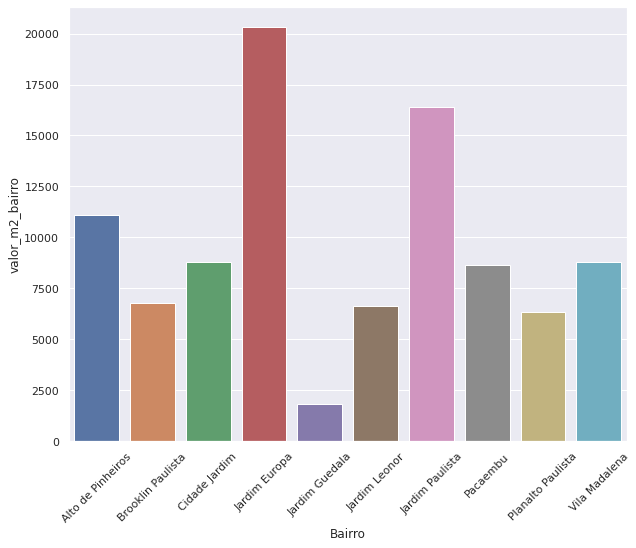

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Bairro", y="valor_m2_bairro", data= dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

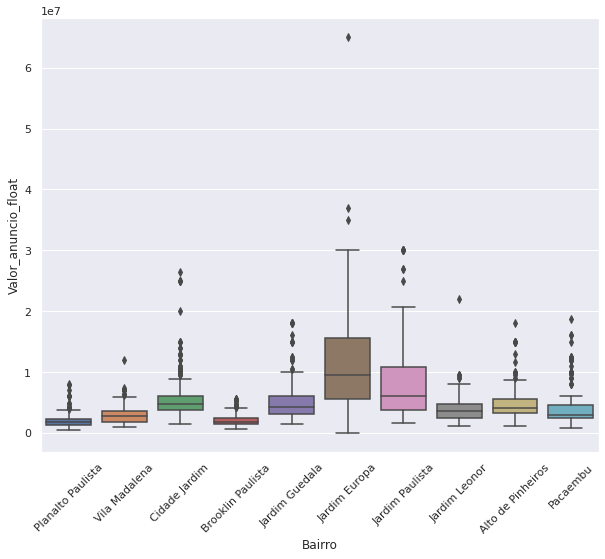

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data= dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

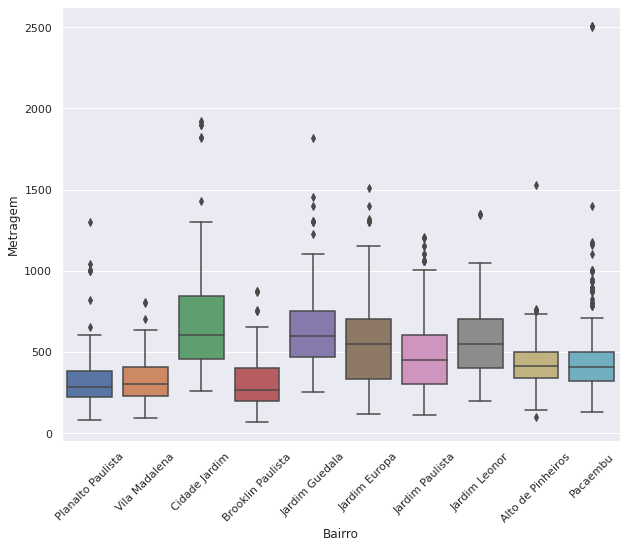

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data= dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,5400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0,5617.977528
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0,7000.000000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0,3801.652893
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0,5121.951220


### Desafios



1.   Ler a base de dados do IBGE e interpretar o significado de cada coluna ( [ler aqui](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view) pag45) (ajuda com [strings](https://panda.ime.usp.br/pensepy/static/pensepy/08-Strings/strings.html))
2.   Analisar os outliers e decidir como tratar
3.   Brincar com o group by e formas de tratar os dados
4.   Organizar o notebook



In [35]:
# Desafio 2- Analisar os outliers e decidir como tratar

#Vou retirar a vila guaca que analisei na outra aula pois pareceu ter sido registrada com erro na metragem
#dados_vendas.drop(9603, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(0.0, 15.0)

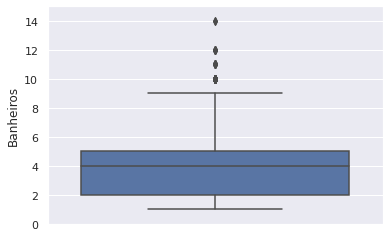

In [40]:
#Primeiro vou ver os outliers num boxplot

sns.boxplot(data= dados_vendas, y= 'Banheiros')
plt.ylim((0, 15))

In [38]:
dados_vendas["Banheiros"].value_counts()

3     1804
4     1664
2     1580
5     1458
1      999
6      890
7      422
8      232
9       54
10      32
11       9
12       7
40       2
14       2
Name: Banheiros, dtype: int64

In [41]:
dados_vendas.query("Banheiros == 40")

#Várias coisas que estou achando estranhas aqui: os dois lugares com 40 banheiros não têm nome de rua e estão no mesmo bairro
#De resto tudo igual, exceto por uma pequena diferença na metragem

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000,R$,2.600.000,None,2600000.0,5327.868852
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000,R$,2.600.000,None,2600000.0,5273.833671


In [42]:
dados_vendas.query("Banheiros == 14")

#Agora está ficando com cara de casa que vira pensionato ou um prédio todo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
2508,NaN,Retiro Morumbi,São Paulo,2100,7,14,12,R$ 19.800.000,R$,19.800.000,None,19800000.0,9428.571429
3997,Rua David Pimentel,Fazenda Morumbi,São Paulo,916,7,14,10,R$ 3.000.000,R$,3.000.000,None,3000000.0,3275.109170


In [45]:
dados_vendas.query("Banheiros == 12 or Banheiros == 11 or Banheiros == 10")

#Qual a metragem comum de uma casa?????
#Na realidade o que eu acho mais estranho é a quantidade de banheiros maior que a de quartos. Geralmente é o oposto

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
614,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,760,5,10,6,R$ 12.000.000,R$,12.000.000,None,12000000.0,15789.473684
630,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,765,5,10,6,R$ 12.000.000,R$,12.000.000,None,12000000.0,15686.274510
937,Rua Bandeirante Sampaio Soares,Vila Morumbi,São Paulo,850,6,11,4,R$ 10.000.000,R$,10.000.000,None,10000000.0,11764.705882
1145,Rua Murtinho Nobre,Butantã,São Paulo,1181,8,10,20,R$ 4.300.000,R$,4.300.000,None,4300000.0,3640.982218
1179,Rua Murtinho Nobre,Butantã,São Paulo,1186,8,10,20,R$ 4.300.000,R$,4.300.000,None,4300000.0,3625.632378
1203,Avenida Piassanguaba,Planalto Paulista,São Paulo,1040,6,12,10,R$ 3.000.000,R$,3.000.000,None,3000000.0,2884.615385
1237,NaN,Jardim Leonor,São Paulo,973,7,10,6,R$ 6.200.000,R$,6.200.000,None,6200000.0,6372.045221
1324,Rua Campo Verde,Jardim Europa,São Paulo,1150,6,10,6,R$ 15.000.000,R$,15.000.000,None,15000000.0,13043.478261
1378,Rua Campo Verde,Jardim Europa,São Paulo,1155,6,10,6,R$ 15.000.000,R$,15.000.000,None,15000000.0,12987.012987
1494,NaN,Alto de Pinheiros,São Paulo,555,5,10,5,R$ 6.200.000,R$,6.200.000,None,6200000.0,11171.171171


(0.0, 40.0)

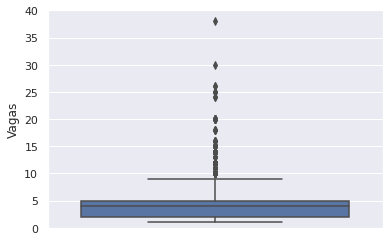

In [47]:
sns.boxplot(data= dados_vendas, y= 'Vagas')
plt.ylim((0, 40))

In [48]:
dados_vendas["Vagas"].value_counts()

2     2276
4     1925
3     1476
6      934
1      771
5      766
8      369
10     246
7      212
12      54
9       40
14      22
15      15
20      12
11      12
16       6
13       4
18       4
25       3
26       2
24       2
50       2
30       1
38       1
Name: Vagas, dtype: int64

In [49]:
dados_vendas.query("Vagas == 50 or Vagas == 38 or Vagas == 30 or Vagas == 26 or Vagas == 25")

#tem estacionamento a venda ou o que
#os dois locais de 500 vagas tem tudo igual exceto uma diferença de 5 na metragem

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
627,Avenida das Magnólias,Cidade Jardim,São Paulo,1915,4,8,25,R$ 25.000.000,R$,25.000.000,None,25000000.0,13054.830287
643,Avenida das Magnólias,Cidade Jardim,São Paulo,1920,4,8,25,R$ 25.000.000,R$,25.000.000,None,25000000.0,13020.833333
1530,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,R$ 65.000.000,R$,65.000.000,None,65000000.0,54166.666667
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000,R$,7.500.000,None,7500000.0,12500.000000
1598,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,R$ 8.000.000,R$,8.000.000,None,8000000.0,9685.230024
1621,NaN,Morumbi,São Paulo,419,3,4,26,R$ 2.800.000,R$,2.800.000,None,2800000.0,6682.577566
1691,NaN,Morumbi,São Paulo,424,3,4,26,R$ 2.800.000,R$,2.800.000,None,2800000.0,6603.773585
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000,R$,3.700.000,None,3700000.0,7400.000000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000,R$,3.700.000,None,3700000.0,7326.732673


In [50]:
dados_vendas.query("Vagas == 24 or Vagas == 18 or Vagas == 13 or Vagas == 16 or Vagas == 20")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
260,Rua dos Franceses,Morro dos Ingleses,São Paulo,1039,6,7,20,R$ 22.000.000,R$,22.000.000,None,22000000.0,21174.205967
353,NaN,Jardim das Camélias,São Paulo,1700,4,7,13,R$ 3.300.000,R$,3.300.000,None,3300000.0,1941.176471
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,R$ 65.000.000,R$,65.000.000,None,65000000.0,43046.357616
699,Rua Puréus,Jardim Guedala,São Paulo,960,4,8,20,R$ 4.800.000,R$,4.800.000,None,4800000.0,5000.000000
1145,Rua Murtinho Nobre,Butantã,São Paulo,1181,8,10,20,R$ 4.300.000,R$,4.300.000,None,4300000.0,3640.982218
1179,Rua Murtinho Nobre,Butantã,São Paulo,1186,8,10,20,R$ 4.300.000,R$,4.300.000,None,4300000.0,3625.632378
1510,Rua Santo Eufredo,Jardim Guedala,São Paulo,780,4,7,20,R$ 5.400.000,R$,5.400.000,None,5400000.0,6923.076923
2307,NaN,Vila Cordeiro,São Paulo,1126,4,6,24,R$ 6.400.000,R$,6.400.000,None,6400000.0,5683.836590
2385,NaN,Jardim Guedala,São Paulo,918,5,3,16,R$ 9.000.000,R$,9.000.000,None,9000000.0,9803.921569
2393,NaN,Jardim Guedala,São Paulo,923,5,3,16,R$ 9.000.000,R$,9.000.000,None,9000000.0,9750.812568


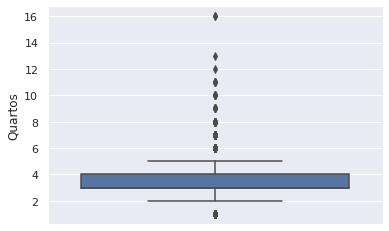

In [51]:
sns.boxplot(data= dados_vendas, y= 'Quartos')

In [55]:
dados_vendas["Quartos"].value_counts()

3     3971
4     2903
2     1164
5      738
6      195
1       92
7       50
8       17
9        8
10       7
11       6
16       2
13       1
12       1
Name: Quartos, dtype: int64

In [54]:
dados_vendas.query("Quartos == 16 or Quartos == 13 or Quartos == 12 or Quartos == 11 or Quartos == 10")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
1127,Rua Bandim,Boaçava,São Paulo,350,11,8,10,R$ 2.500.000,R$,2.500.000,None,2500000.0,7142.857143
1273,NaN,Vila Monumento,São Paulo,750,10,8,8,R$ 3.500.000,R$,3.500.000,None,3500000.0,4666.666667
1726,NaN,Jardim Paulista,São Paulo,450,13,7,7,R$ 13.000.000,R$,13.000.000,None,13000000.0,28888.888889
3960,Rua Morro Verde,Pacaembu,São Paulo,1000,11,6,10,R$ 5.499.000,R$,5.499.000,None,5499000.0,5499.000000
5035,NaN,Jardim Gonzaga,São Paulo,378,10,8,8,R$ 950.000,R$,950.000,None,950000.0,2513.227513
5088,NaN,Jardim Gonzaga,São Paulo,383,10,8,8,R$ 950.000,R$,950.000,None,950000.0,2480.417755
5151,NaN,Jardim Gonzaga,São Paulo,383,10,8,8,R$ 950.000,R$,950.000,None,950000.0,2480.417755
5175,NaN,Parque São Lucas,São Paulo,367,12,5,4,R$ 950.000,R$,950.000,None,950000.0,2588.555858
5502,Rua Santo Afonso,Penha de França,São Paulo,1100,10,8,10,R$ 3.500.000,R$,3.500.000,None,3500000.0,3181.818182
5572,Rua Santo Afonso,Penha de França,São Paulo,1105,10,8,10,R$ 3.500.000,R$,3.500.000,None,3500000.0,3167.420814


(0.0, 3000.0)

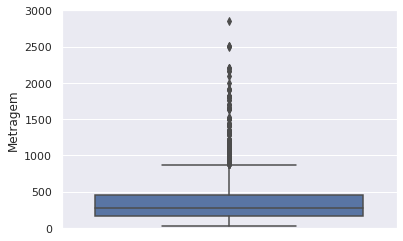

In [59]:
sns.boxplot(data= dados_vendas, y= 'Metragem')
plt.ylim((0, 3000))

In [66]:
#Isso aqui não funcionou pois o index está com os números antigos, então é necessário resetar ele
met = dados_vendas["Metragem"].sort_values(ascending=False)[:30].index
dados_vendas.query("Metragem in @met")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
105,NaN,Sumaré,São Paulo,627,3,6,6,R$ 4.950.000,R$,4.950.000,None,4950000.0,7894.736842
2099,NaN,Jardim Europa,São Paulo,643,4,4,7,R$ 18.000.000,R$,18.000.000,None,18000000.0,27993.779160
3018,Rua Stefan Marek Neuding,Jardim Sílvia (Zona Oeste),São Paulo,627,4,6,6,R$ 5.000.000,R$,5.000.000,None,5000000.0,7974.481659
3943,Rua Curupaiti,Bela Aliança,São Paulo,353,4,6,3,R$ 2.900.000,R$,2.900.000,None,2900000.0,8215.297450
4097,"Avenida Professor Fonseca Rodrigues, 0",Alto de Pinheiros,São Paulo,627,4,6,4,R$ 7.599.600,R$,7.599.600,None,7599600.0,12120.574163
4180,NaN,Vila Madalena,São Paulo,627,7,5,5,R$ 7.000.000,R$,7.000.000,None,7000000.0,11164.274322
5092,"Avenida Professor Fonseca Rodrigues, 0",Alto de Pinheiros,São Paulo,627,4,6,4,R$ 7.600.000,R$,7.600.000,None,7600000.0,12121.212121
5274,NaN,Jardim Leonor,São Paulo,627,4,5,10,R$ 3.700.000,R$,3.700.000,None,3700000.0,5901.116427
5992,NaN,Alto da Lapa,São Paulo,353,3,4,6,R$ 2.100.000,R$,2.100.000,None,2100000.0,5949.008499
6251,Rua Pirandello,Brooklin Paulista,São Paulo,643,4,7,8,R$ 4.800.000,R$,4.800.000,None,4800000.0,7465.007776


In [68]:
dados_vendas.reset_index(inplace=True)
dados_vendas.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,5400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9150,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0,5617.977528
9151,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0,7000.000000
9152,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0,3801.652893
9153,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0,5121.951220


In [73]:
met = dados_vendas["Metragem"].sort_values(ascending=False)[:30].index
#aqui eu descobri que na realidade não tinha funcionado porque estava selecionando pelo método errado
dados_vendas.iloc[met, :]

#Muitos desses outliers de metragem são também outlier de vagas (10+) e de preço

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro
9000,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,9.333333
5971,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000,R$,2.900.000,None,2900000.0,78.378378
6240,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000,R$,2.550.000,None,2550000.0,71.474620
4309,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,R$ 4.000.000,R$,4.000.000,None,4000000.0,1403.508772
7175,Rua Itassuce,Pacaembu,São Paulo,2505,3,7,12,R$ 12.500.000,R$,12.500.000,None,12500000.0,4990.019960
7066,Rua Itassuce,Pacaembu,São Paulo,2505,3,7,12,R$ 12.500.000,R$,12.500.000,None,12500000.0,4990.019960
6411,Rua Itassuce,Pacaembu,São Paulo,2500,3,7,12,R$ 12.500.000,R$,12.500.000,None,12500000.0,5000.000000
6777,"Rua General Pereira da Cunha, 505",Retiro Morumbi,São Paulo,2200,6,6,12,R$ 19.000.000,R$,19.000.000,None,19000000.0,8636.363636
6372,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2200,6,9,15,R$ 19.800.000,R$,19.800.000,None,19800000.0,9000.000000
6264,NaN,Retiro Morumbi,São Paulo,2200,6,8,12,R$ 19.000.000,R$,19.000.000,None,19000000.0,8636.363636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(0.0, 40.0)

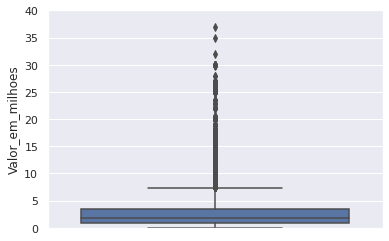

In [74]:
dados_vendas["Valor_em_milhoes"] = dados_vendas["Valor_anuncio_float"]/1000000
sns.boxplot(data= dados_vendas, y= 'Valor_em_milhoes');
plt.ylim((0, 40))

In [76]:
dindin = dados_vendas["Valor_em_milhoes"].sort_values(ascending=False)[:30].index
dados_vendas.iloc[dindin, :]

#Os valores mais altos de outlier são também outlier de banheiros, vagas e metragens
#Eu decidiria retirar os dados que são outlier em mais de duas características, pois devem ser diferentes tipos de imóvel

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,preco_metro,Valor_em_milhoes
373,NaN,Jardim Europa,São Paulo,1510,5,5,20,R$ 65.000.000,R$,65.000.000,None,65000000.0,43046.357616,65.000
6239,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,R$ 65.000.000,R$,65.000.000,None,65000000.0,54166.666667,65.000
1387,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,R$ 65.000.000,R$,65.000.000,None,65000000.0,54166.666667,65.000
5542,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,R$ 55.000.000,R$,55.000.000,None,55000000.0,30286.343612,55.000
3170,NaN,Jardim América,São Paulo,773,4,4,10,R$ 45.825.000,R$,45.825.000,None,45825000.0,59282.018111,45.825
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000,R$,37.000.000,None,37000000.0,48941.798942,37.000
2609,Rua ESão Pauloanha,Jardim Europa,São Paulo,1400,4,8,6,R$ 35.000.000,R$,35.000.000,None,35000000.0,25000.000000,35.000
7601,NaN,Jardim Petrópolis,São Paulo,912,4,6,10,R$ 32.000.000,R$,32.000.000,None,32000000.0,35087.719298,32.000
2024,NaN,Jardim Paulista,São Paulo,1065,5,6,4,R$ 30.000.000,R$,30.000.000,None,30000000.0,28169.014085,30.000
4178,Rua Joaquim Cândido de Azevedo Marques,Vila Morumbi,São Paulo,1100,5,7,8,R$ 30.000.000,R$,30.000.000,None,30000000.0,27272.727273,30.000


### Desafio 1

In [4]:
## Desafio 1
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"

#Primeiro notei que o csv estava com ';' como separador e o default da fç read csv é ','
ibge = pd.read_csv(ibge_url, sep=";")

In [9]:
# Agora com as colunas organizadas muitas strings têm que ser corrigidas pois a acentuação não foi reconhecida
ibge

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,61","772,09","168751,1","814,52","143188,21","467,46","191332,48","699,95","123399,08",NaN
18359,355030896000244,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,49","692,5","239941,27","812,93","182516,2","439,33","194034,99","702,1","124952,38",NaN
18360,355030896000245,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,54","630,06","329705,22","843,31","260395,9","347,6","228162,66","767,5","181129,99",NaN
18361,355030896000246,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"4,21","597,37",349101,908,"244391,67","397,76","436942,16","854,2","550319,43",NaN


In [10]:
#Primeiro quero ver quais são todas as colunas
ibge.columns

#Apenas uma precisa ser corrigida

Index(['Cod_setor', 'Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009', 'V010', 'V011', 'V012', 'Unnamed: 33'],
      dtype='object')

In [5]:
#Também vi que tem um espaço depois da coluna nome_da_uf, então vou renomear tirando esse espaço
ibge.rename(columns={'Cod_Grandes Regi�es': 'Cod_Grandes_Regioes', 'Nome_da_UF ': 'Nome_da_UF'}, inplace=True)

In [13]:
#Dentro da tabela a primeira coluna com itens errados é a nome_grande_regiao.
#Como tem apenas um valor utilizei o replace, um método simples do próprio python iterando por todos os valores
#Então guardei os novos valores numa variável

troca = list(map(lambda x: x.replace("Regi�o", "Regiao"), ibge['Nome_Grande_Regiao']))

In [6]:
#Fiz uma cópia da tabela para não correr o risco de fazer algo errado e perder os dados
ibge_reserva = ibge

In [15]:
#Renomeando a coluna com os nomes corrigidos
ibge_reserva['Nome_Grande_Regiao'] = troca
ibge_reserva

,Cod_setor,Cod_Grandes_Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,61","772,09","168751,1","814,52","143188,21","467,46","191332,48","699,95","123399,08",NaN
18359,355030896000244,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,49","692,5","239941,27","812,93","182516,2","439,33","194034,99","702,1","124952,38",NaN
18360,355030896000245,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,54","630,06","329705,22","843,31","260395,9","347,6","228162,66","767,5","181129,99",NaN
18361,355030896000246,3,Regiao Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"4,21","597,37",349101,908,"244391,67","397,76","436942,16","854,2","550319,43",NaN


In [16]:
#Aqui eu vi que de fato tem apenas uma grande região nos dados
ibge_reserva['Cod_Grandes_Regioes'].unique()

array([3])

In [ ]:
#Repetindo o mesmo método para corrigir as novas colunas. Fazendo isso apenas para aprendizado já que vou tirar tudo fora depois por serem colunas que não carregam diferentes informações
troca = list(map(lambda x: x.replace("S�o Paulo", "Sao Paulo"), ibge['Nome_da_UF']))
troca

In [ ]:
ibge_reserva['Nome_da_UF'] = troca
ibge_reserva

In [ ]:
troca = list(map(lambda x: x.replace("S�o Paulo", "Sao Paulo"), ibge['Nome_da_micro']))
troca

In [ ]:
ibge_reserva['Nome_da_micro'] = troca
ibge_reserva

In [ ]:
troca = list(map(lambda x: x.replace("S�o Paulo", "Sao Paulo"), ibge['Nome_da_meso']))
troca

In [ ]:
ibge_reserva['Nome_da_meso'] = troca
ibge_reserva

In [23]:
#Então resolvi olhar para as colunas que têm apenas um valor para decidir quais tirar
ibge_reserva['Nome_da_RM'].unique()

array(['RM S�o Paulo'], dtype=object)

In [24]:
ibge_reserva['Nome_do_municipio'].unique()

array(['S�O PAULO'], dtype=object)

In [26]:
ibge.columns

Index(['Cod_setor', 'Cod_Grandes_Regioes', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009', 'V010', 'V011', 'V012', 'Unnamed: 33'],
      dtype='object')

In [33]:
#Distrito e subdistrito nesse caso são a mesma coisa?
ibge.query('Nome_do_distrito != Nome_do_subdistrito')

#sim, então posso retirar um deles

,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33


In [7]:
# Na documentação do IBGE pareceu que essas colunas são a mesma coisa

ibge.query('Situacao_setor != Tipo_setor')

#No entanto elas estão com valores diferentes para cada local então não quero remover uma delas

,Cod_setor,Cod_Grandes_Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18348,355030896000233,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"3,08","741,33","184120,9","811,46","144092,31","477,89","196505,02","715,12","123884,55",NaN
18349,355030896000234,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"1,67","741,77","193507,47","817,85","150018,61","438,64","225145,03","759,9","144782,86",NaN
18351,355030896000236,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,75","629,66","265652,18","798,54","201833,14","396,12","231377,73","726,32","184343,62",NaN
18353,355030896000238,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,81","625,12","608148,45","1060,8","569241,95","543,93","396414,93","931,28","317585,92",NaN


In [43]:
ibge['Unnamed: 33'].unique()

array([nan])

In [8]:
ibge['Nome_do_bairro'].unique()

#hmmmm os bairros não estão cadastrados

array(['S�O PAULO (todos os setores)'], dtype=object)

In [9]:
ibge['Cod_bairro'].unique()

#realmente, sem bairros

array([3550308000])

In [10]:
#Eu vou retirar as colunas que tem apenas um valor ou que são iguais a outras colunas
#Sim, eu fiquei limpando as colunas para apenas retirar elas depois

ibge_reserva.drop(['Cod_setor','Cod_Grandes_Regioes', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Unnamed: 33'], axis=1, inplace=True)

In [11]:
ibge_reserva

,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801,�GUA RASA,1,0,266.0,800.0,"3,01","2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86"
1,355030801,�GUA RASA,1,0,306.0,913.0,"2,98","2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94"
2,355030801,�GUA RASA,1,0,189.0,625.0,"3,31","3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74"
3,355030801,�GUA RASA,1,0,181.0,572.0,"3,16","2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24"
4,355030801,�GUA RASA,1,0,240.0,754.0,"3,14","2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896,LAJEADO,1,1,96.0,336.0,"3,5","2,61","772,09","168751,1","814,52","143188,21","467,46","191332,48","699,95","123399,08"
18359,355030896,LAJEADO,1,1,54.0,209.0,"3,87","2,49","692,5","239941,27","812,93","182516,2","439,33","194034,99","702,1","124952,38"
18360,355030896,LAJEADO,1,1,87.0,339.0,"3,9","2,54","630,06","329705,22","843,31","260395,9","347,6","228162,66","767,5","181129,99"
18361,355030896,LAJEADO,1,0,38.0,163.0,"4,29","4,21","597,37",349101,908,"244391,67","397,76","436942,16","854,2","550319,43"


In [51]:
#Vendo quais são os distritos e quais devem ser renomeados
ibge_reserva['Nome_do_distrito'].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

In [81]:
#Renomeando os distritos

ibge_reserva = ibge_reserva.replace({'Nome_do_distrito': { "�GUA RASA": "AGUA RASA", "BEL�M": "BELEM", "BR�S": "BRAS", "BRASIL�NDIA": "BRASILANDIA", "BUTANT�": "BUTANTA", "CAP�O REDONDO": "CAPAO REDONDO", "CARR�O": "CARRAO",
       "CONSOLA��O": "CONSOLACAO", "FREGUESIA DO �": "FREGUESIA DO O", "GRAJA�": "GRAJAU", "JA�AN�": "JACANA", "JAGUAR�": "JAGUARE", "JARAGU�": "JARAGUA", "JARDIM �NGELA": "JARDIM ANGELA",
       "JARDIM S�O LU�S": "JARDIM SAO LUIS", "JOS� BONIF�CIO": "JOSE BONIFACIO", "LIM�O": "LIMAO", "REP�BLICA": "REPUBLICA", "SACOM�": "SACOMA", "SANTA CEC�LIA": "SANTA CECILIA",
       "S�O LUCAS": "SAO LUCAS", "S�O MATEUS": "SAO MATEUS", "S�O MIGUEL": "SAO MIGUEL", "S�O RAFAEL": "SAO RAFAEL", "SA�DE": "SAUDE", "S�": "SE", "TATUAP�": "TATUAPE", "TREMEMB�": "TREMEMBE",
       "VILA CURU��": "VILA CURUCA", "VILA JACU�": "VILA JACUI", "VILA S�NIA": "VILA SONIA", "S�O DOMINGOS": "SAO DOMINGOS" }})

In [82]:
#Conferindo se foram corretamente corrigidos

ibge_reserva['Nome_do_distrito'].unique()

array(['AGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BELEM', 'BOM RETIRO',
       'BRAS', 'BRASILANDIA', 'BUTANTA', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAPAO REDONDO', 'CARRAO', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLACAO',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO O', 'GRAJAU',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JACANA', 'JAGUARA',
       'JAGUARE', 'JARAGUA', 'JARDIM ANGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM SAO LUIS', 'JOSE BONIFACIO', 'LAPA',
       'LIBERDADE', 'LIMAO', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REPUBLICA

In [84]:
ibge_reserva

,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801,AGUA RASA,1,0,266.0,800.0,"3,01","2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86"
1,355030801,AGUA RASA,1,0,306.0,913.0,"2,98","2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94"
2,355030801,AGUA RASA,1,0,189.0,625.0,"3,31","3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74"
3,355030801,AGUA RASA,1,0,181.0,572.0,"3,16","2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24"
4,355030801,AGUA RASA,1,0,240.0,754.0,"3,14","2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896,LAJEADO,1,1,96.0,336.0,"3,5","2,61","772,09","168751,1","814,52","143188,21","467,46","191332,48","699,95","123399,08"
18359,355030896,LAJEADO,1,1,54.0,209.0,"3,87","2,49","692,5","239941,27","812,93","182516,2","439,33","194034,99","702,1","124952,38"
18360,355030896,LAJEADO,1,1,87.0,339.0,"3,9","2,54","630,06","329705,22","843,31","260395,9","347,6","228162,66","767,5","181129,99"
18361,355030896,LAJEADO,1,0,38.0,163.0,"4,29","4,21","597,37",349101,908,"244391,67","397,76","436942,16","854,2","550319,43"


ok, data frame organizado tanto quanto eu tenho alcance no momento.

O que é cada coluna?

*   Cod_distrito e Nome_do_distrito são os nomes dos distritos e seus respectivos códigos
*   Eu não sei qual a diferença entre situação e tipo do setor pois no documento do IBGE só há explicação da situação do setor


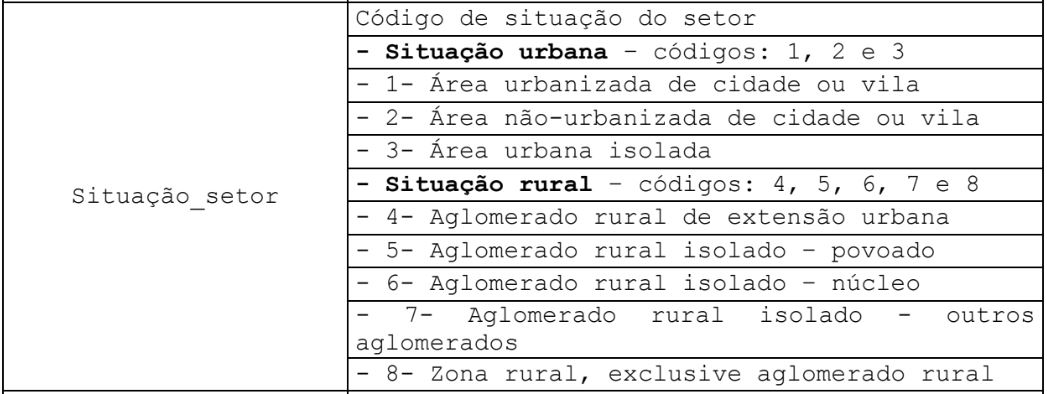

*  V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
*  V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes
*  V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
*  V004: Variância do número de moradores em domicílios particulares permanentes
*  V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
*  V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
*  V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
*  V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
*  V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
*  V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
*  V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
*  V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

Ok, e o que quer dizer cada uma dessas coisas?

Primeiramente eu acho que cada linha representa um bairro, que era o último classificador geográfico da base, mas infelizmente todos os valores vieram iguais, então restam os valores por distrito. Uma possibilidade seria colocar na tabela de imóveis uma coluna indicando o distrito de cada bairro para poder juntar com os dados do IBGE.

Entendo que os domicílios particulares permanentes sejam as casas próprias. Acredito que a diferença entre o primeiro e o segundo classificador sejam os alugueis, aí me falha a interpretação. Naquele extenso pdf deve haver a explicação em algum lugar. 

Ao meu ver primeiro ele dá a somatória dos valores daquele bairro para depois dar a informação estatística de variância daqueles valores. Então aí já vejo uma limitação estatística na avaliação desses dados.


Quanto aos diferentes valores de rendimento não sei pontuar o que exatamente cada um significa. Novamente, em algum lugar daquele extenso pdf deve haver a resposta.